In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
## If your system supports GPU, uncomment the following:

# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Load Dateset


In [3]:
## link: https://www.cs.toronto.edu/~kriz/cifar.html
# size = 163 MB
# labels:
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(f"dtype of X_train: {X_train.dtype}")
print(f"max of X_train: {X_train.max()}")

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
dtype of X_train: uint8
max of X_train: 255


In [4]:
num_of_unique_labels = pd.Series(y_train[:, 0]).nunique()
print(f"Number of unique labels: {num_of_unique_labels}")
print(pd.Series(y_train[:, 0]).value_counts().sort_index())

Number of unique labels: 10
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64


In [5]:
label_map = {
    0: "airplane", 1: "automobile", 2: "bird",
    3: "cat", 4: "deer", 5: "dog", 6: "frog",
    7: "horse", 8: "ship", 9: "truck",
}

## Date visualization

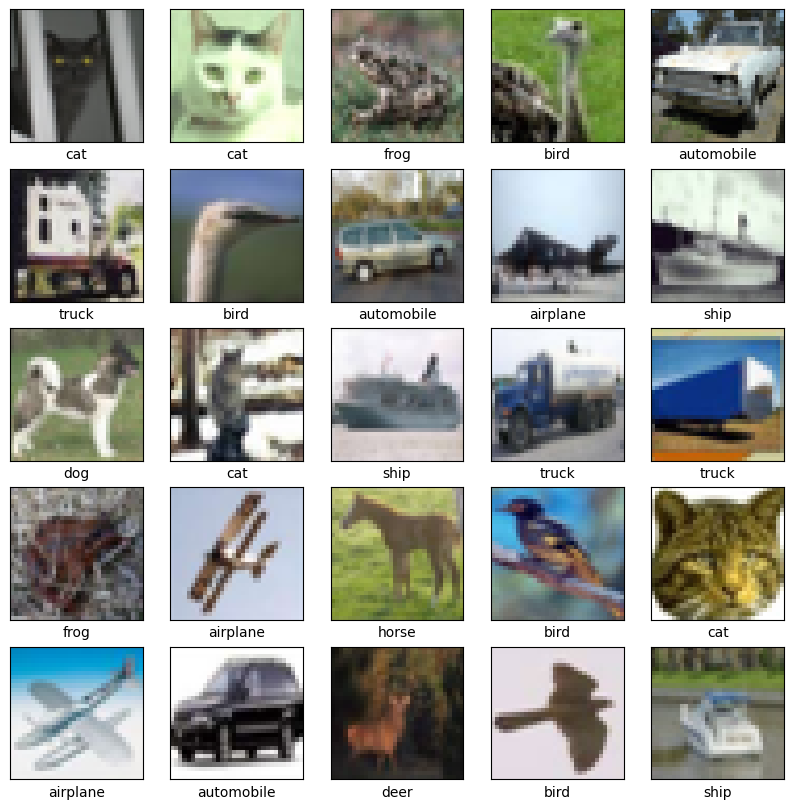

In [6]:
np.random.seed(120)
plt.figure(figsize=[10,10])
n = 0
for i in np.random.randint(0, len(X_train), size=25):
    n += 1
    plt.subplot(5, 5, n)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(label_map[int(y_train[i])])

plt.show()

## Data preprocessing


In [7]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.max())

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
1.0


## Create a simple CNN model


In [8]:
model = keras.Sequential(name="cifar10_model")

model.add(keras.Input(shape=(32, 32, 3), name="input_layer"))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax', name="output_layer"))

# Checking the model summary
model.summary()

Model: "cifar10_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                     

## Compiling the model


In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

## Fitting the model


In [10]:
# history = model.fit(
#     X_train, y_train,
#     batch_size=64,
#     epochs=100,
#     validation_data=(X_test, y_test)
# )

## Save weights and history

In [11]:
# model.save_weights("cifar10_weights.h5")
# pd.DataFrame(history.history).to_csv("cifar10_history.csv")

## Load pretrained data

In [12]:
model.load_weights("cifar10_weights.h5")
history = pd.read_csv("cifar10_history.csv")

## Evaluationg the model


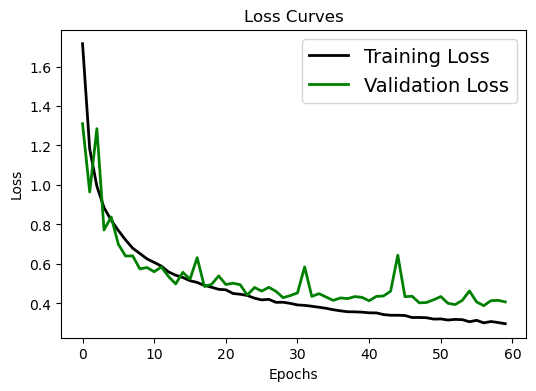

In [13]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history['loss'], 'black', linewidth=2.0)
plt.plot(history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12);

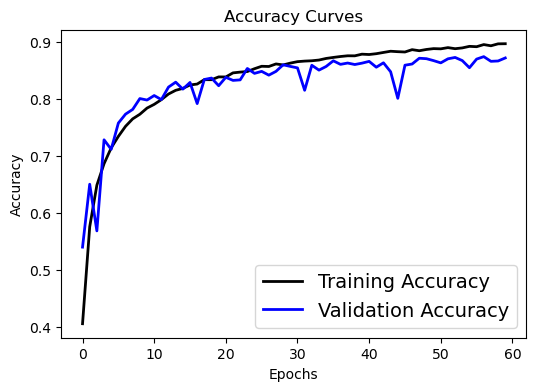

In [14]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history['accuracy'], 'black', linewidth=2.0)
plt.plot(history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12);

## Testing the model

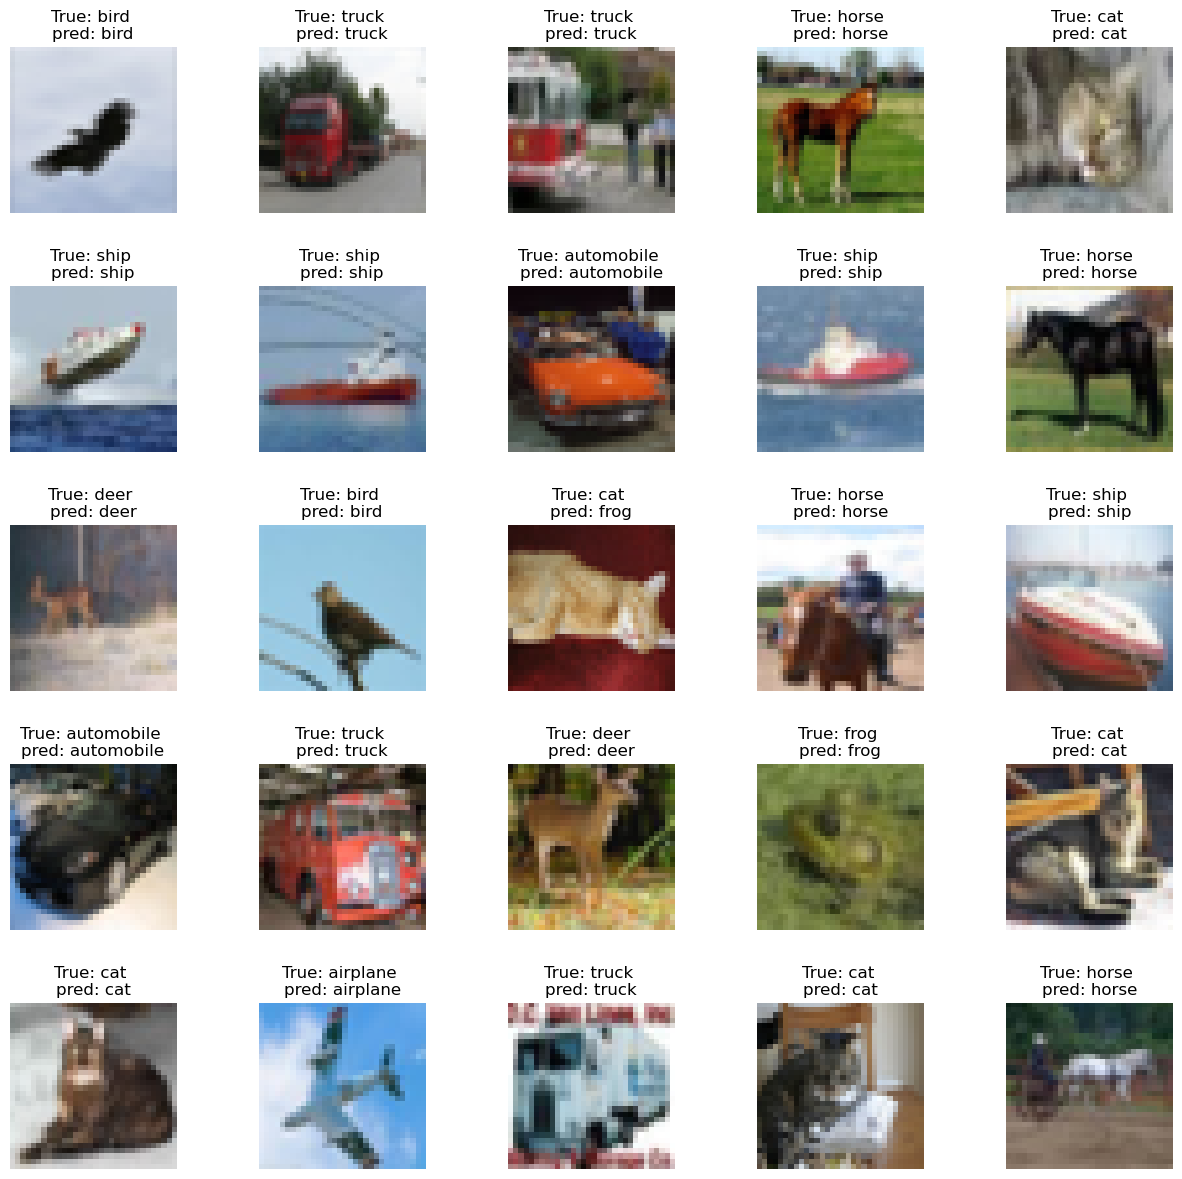

In [15]:
# Plotting the Actual vs. Predicted results
np.random.seed(101)
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
n = 0
for i in np.random.randint(0, len(X_test), size=25):
    single_test = X_test[i].reshape(-1, 32, 32, 3)
    y_pred = model.predict(single_test, verbose="0").argmax()
    y_true = int(y_test[i])
    axes[n].imshow(X_test[i])
    axes[n].set_title(f"True: {label_map[y_true]} \npred: {label_map[y_pred]}")
    axes[n].axis('off')
    n +=1
    plt.subplots_adjust(wspace=0.5)